# Algoritmos de Machine Learning para Predecir la calidad del Vino blanco y rojo 

Primeramente se desarrolla el tratamiento de datos, se realiza la separacion de vino blanco, vino rojo, y se eliminan las celdas que contienen datos vacios (NaN) 

In [8]:
import pandas as pd

In [9]:
datos = pd.read_csv("winequalityN.csv")

In [10]:
datos

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
columnas_con_faltantes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

datos = datos.dropna(subset=columnas_con_faltantes)

In [12]:
datos

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: title={'center': 'Cantidad de datos de la calidad del vino'}, xlabel='quality'>

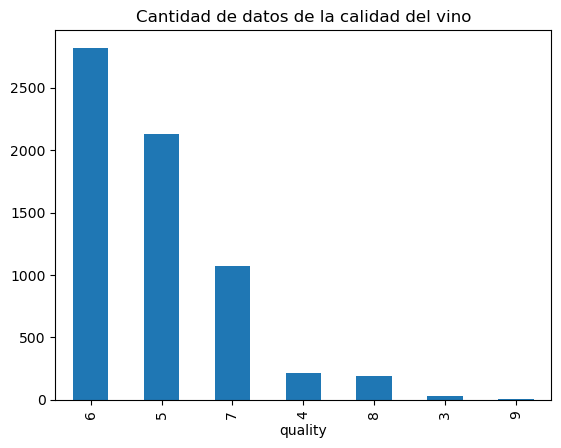

In [13]:
datos["quality"].value_counts().plot(kind='bar', title='Cantidad de datos de la calidad del vino')

In [14]:
datos_r = datos[datos['type'] == 'red']
datos_b = datos[datos['type'] == 'white']

In [15]:
datos_rojos= datos_r.drop('type',axis=1)
datos_blancos = datos_b.drop('type',axis=1)

In [16]:
X_rojo = datos_rojos.drop('quality', axis=1)
y_rojo = datos_rojos['quality']
X_blanco = datos_blancos.drop('quality', axis=1)
y_blanco = datos_blancos['quality']

In [17]:
from sklearn.model_selection import train_test_split

### separacion de datos, entrenamiento (80%) y validacion (20%)

In [18]:
X_train_rojo, X_val_rojo, y_train_rojo, y_val_rojo = train_test_split(X_rojo, y_rojo, test_size=0.2, random_state=42)
X_train_blanco, X_val_blanco, y_train_blanco, y_val_blanco = train_test_split(X_blanco, y_blanco, test_size=0.2, random_state=42)

(974,)

# Random Forest (VINO ROJO) Clasificador

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_rojo, y_train_rojo)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rf_classifier.predict(X_val_rojo)

In [42]:
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
def plot(y_val_rojo, y_pred):
    labels = unique_labels(y_train_rojo)
    column = [f'Predicccion {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val_rojo, y_pred),
                         columns=column,index=indices)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

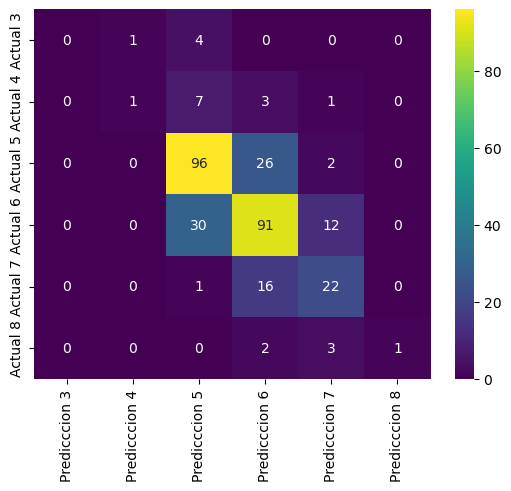

In [53]:
plot(y_val_rojo,y_pred)

In [47]:
def plot2(y_val_rojo, y_pred):
    labels = unique_labels(y_val_rojo)
    column = [f'Predicción {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    conf_matrix = confusion_matrix(y_val_rojo, y_pred)
    row_sums = conf_matrix.sum(axis=1)
    normalized_matrix = conf_matrix / row_sums[:, np.newaxis]
    table = pd.DataFrame(normalized_matrix, columns=column, index=indices)
    return sns.heatmap(table, annot=True, fmt='.2f', cmap='viridis')

<Axes: >

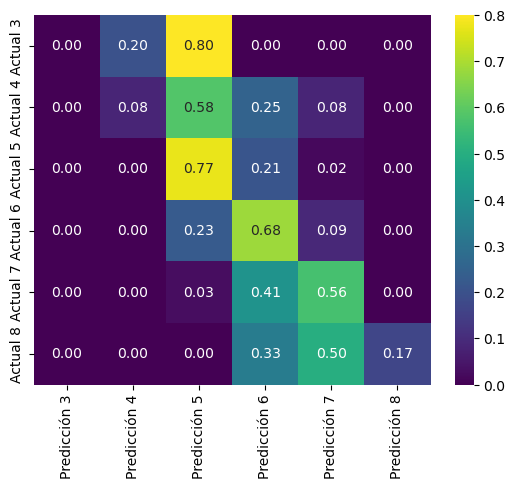

In [52]:
plot2(y_val_rojo, y_pred)

In [51]:
accuracy = accuracy_score(y_val_rojo, y_pred)
classification_rep = classification_report(y_val_rojo, y_pred, zero_division=1)
print("Precisión:", accuracy)
print("Informe de Clasificación:\n")
print(classification_rep)

Precisión: 0.6614420062695925
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       0.50      0.08      0.14        12
           5       0.70      0.77      0.73       124
           6       0.66      0.68      0.67       133
           7       0.55      0.56      0.56        39
           8       1.00      0.17      0.29         6

    accuracy                           0.66       319
   macro avg       0.73      0.38      0.40       319
weighted avg       0.67      0.66      0.64       319



# Random Forest (VINO BLANCO) Clasificador

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_blanco, y_train_blanco)

RandomForestClassifier(random_state=42)

In [66]:
y_predb = rf_classifier.predict(X_val_blanco)

In [67]:
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
def plot(y_val_blanco, y_predb):
    labels = unique_labels(y_val_blanco)
    column = [f'Predicccion {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val_blanco, y_predb),
                         columns=column,index=indices)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

In [83]:
labels = unique_labels(y_train_blanco)

In [77]:
y_val_blanco.shape

(974,)

In [78]:
y_predb.shape

(974,)

<Axes: >

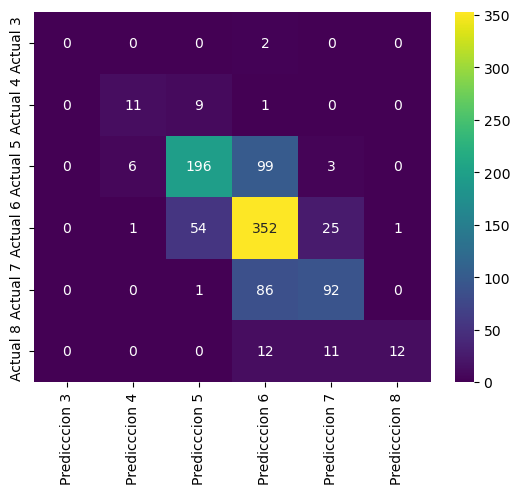

In [84]:
plot(y_val_blanco,y_predb)

In [91]:
def plot2(y_val_blanco, y_predb):
    labels = unique_labels(y_val_blanco)
    column = [f'Predicción {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    conf_matrix = confusion_matrix(y_val_blanco, y_predb)
    row_sums = conf_matrix.sum(axis=1)
    normalized_matrix = conf_matrix / row_sums[:, np.newaxis]
    table = pd.DataFrame(normalized_matrix, columns=column, index=indices)
    return sns.heatmap(table, annot=True, fmt='.2f', cmap='viridis')

<Axes: >

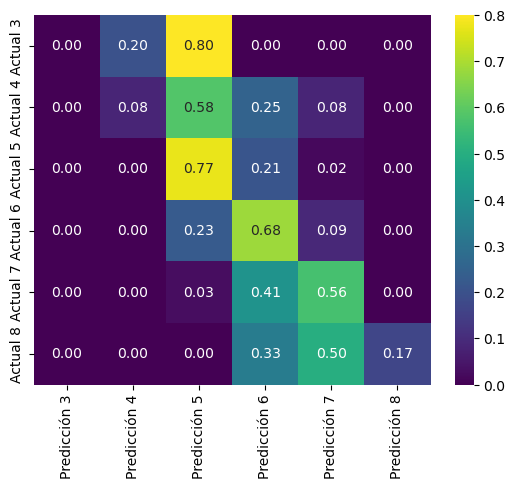

In [90]:
plot2(y_val_rojo, y_pred)

In [51]:
accuracy = accuracy_score(y_val_rojo, y_pred)
classification_rep = classification_report(y_val_rojo, y_pred, zero_division=1)
print("Precisión:", accuracy)
print("Informe de Clasificación:\n")
print(classification_rep)

Precisión: 0.6614420062695925
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       0.50      0.08      0.14        12
           5       0.70      0.77      0.73       124
           6       0.66      0.68      0.67       133
           7       0.55      0.56      0.56        39
           8       1.00      0.17      0.29         6

    accuracy                           0.66       319
   macro avg       0.73      0.38      0.40       319
weighted avg       0.67      0.66      0.64       319



In [93]:
accuracy = accuracy_score(y_val_blanco, y_predb)
classification_rep = classification_report(y_val_blanco, y_predb, zero_division=0)
print("Precisión:", accuracy)
print("Informe de Clasificación:\n")
print(classification_rep)

Precisión: 0.6806981519507187
Informe de Clasificación:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.61      0.52      0.56        21
           5       0.75      0.64      0.70       304
           6       0.64      0.81      0.71       433
           7       0.70      0.51      0.59       179
           8       0.92      0.34      0.50        35

    accuracy                           0.68       974
   macro avg       0.60      0.47      0.51       974
weighted avg       0.69      0.68      0.67       974

